In [1]:
from IPython.display import HTML
HTML(open("../style.css", "r").read())

# Polynomial Regression: German Civil Servant Salaries

In this notebook, we analyze the official salary table for German Federal Civil Servants (**Bundesbesoldungsordnung A**).

We investigate the relationship between the **Pay Grade (Besoldungsgruppe)** and the **Maximum Monthly Salary**.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Data Entry
We manually enter the raw data from the [official salary table](https://oeffentlicher-dienst.info/c/t/rechner/beamte/bund?id=beamte-bund-2025&matrix=1). We define them as standard Python lists.
The data is valid from 01.04.2025-30.04.2026.
We use the maximum step (*Endstufe*) for each grade. Note that grades A1 and A2 have been abolished, so our data starts at A3.

The list `grades_list` contains the number from 3 to 16, corresponding to the pay grades `A3` to `A16`.

In [3]:
grades_list = list(range(3, 16+1))

The list `salary_list` contains the maximum monthly salary in Euro for the given pay grade. 

In [4]:
salary_list = [
    3156.42, 3267.76, 3369.46, 3526.11, 3794.62, 
    4101.79, 4411.80, 4917.77, 5458.71, 5989.42, 
    6620.73, 7182.11, 8081.71, 8978.48
]

We verify the number of data points ($m$). 

In [5]:
m = len(salary_list)
m

14

### 2. Plotting the Data 

If we have only one independent variable, we should start our investigation by plotting the data.

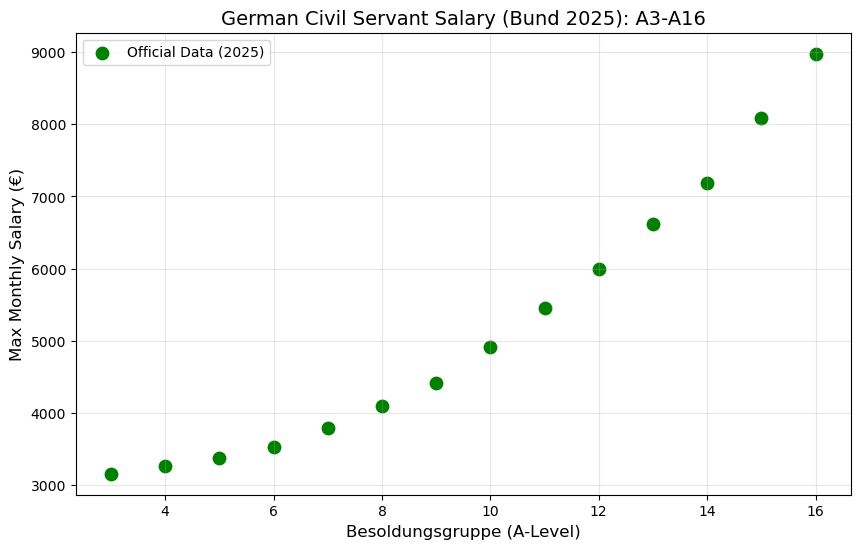

In [6]:
steps = 100
x_min, x_max = 3.0, 16.0
step_size = (x_max - x_min) / steps
plot_x_vals = [x_min + i * step_size for i in range(steps + 1)]

plt.figure(figsize=(10, 6))
plt.scatter(grades_list, salary_list, color='green', s=80, label='Official Data (2025)')
plt.title('German Civil Servant Salary (Bund 2025): A3-A16', fontsize=14)
plt.xlabel('Besoldungsgruppe (A-Level)', fontsize=12)
plt.ylabel('Max Monthly Salary (€)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3. Linear Model (Degree 1)
First, we try to fit a straight line ($y = w_0 + w_1 x$).

To create the feature matrix `X`, we iterate through our grades list. For every grade $x$, we create a row $[x, 1]$. The $1$ is added for the bias term.
We construct X as a list of lists: $[[x_1, 1], [x_1, 1], ..., [x_m, 1]]$

In [7]:
X_linear = [[x, 1.0] for x in grades_list]

We convert the feature matrix `X_linear` and the salaries list to `numpy` arrays.

In [8]:
X_linear = np.array(X_linear)
Y        = np.array(salary_list)

Next, we solve the *normal equation* $(X^T \cdot X) \cdot w = X^T \cdot Y$.

In [9]:
w_linear = np.linalg.solve(X_linear.T @ X_linear, X_linear.T @ Y)

In [10]:
print(f"Linear Weights: Slope={w_linear[0]:.2f}, Intercept={w_linear[1]:.2f}")

Linear Weights: Slope=439.93, Intercept=1024.75


### 4. Polynomial Model (Degree 2)
The salary jumps increase as we go higher up. Therefore, we try the quadratic model $y = w_0 + w_1 \cdot x + w_2 \cdot x^2$ next.

We construct the feature matrix `X_poly` by creating rows of the form $[x^2, x, 1]$.

In [11]:
X_poly = [[x**2, x, 1.0] for x in grades_list]

In [12]:
X_poly = np.array(X_poly)

We solve the *normal equation*.

In [13]:
w_poly = np.linalg.solve(X_poly.T @ X_poly, X_poly.T @ Y)

In [14]:
print(f"Poly Weights: Quadratic={w_poly[0]:.2f}, Linear={w_poly[1]:.2f}, Intercept={w_poly[2]:.2f}")

Poly Weights: Quadratic=32.64, Linear=-180.30, Intercept=3440.38


### 5. Comparison
We calculate the $R^2$ scores to quantify the improvement.

In [15]:
y_mean = np.mean(Y)
TSS = np.sum((Y - y_mean)**2)

We calculate the score for the linear model.

In [16]:
RSS_linear = np.sum((X_linear @ w_linear - Y)**2)
R2_linear = 1 - RSS_linear / TSS
R2_linear

np.float64(0.9335630422604908)

We calculate the score for the quadratic model.

In [17]:
RSS_poly = np.sum((X_poly @ w_poly - Y)**2)
R2_poly = 1 - RSS_poly / TSS
R2_poly

np.float64(0.9993574343077025)

The quadratic model ($R^2 \approx 0.9994$) is a near-perfect fit.

### 6. Visualization

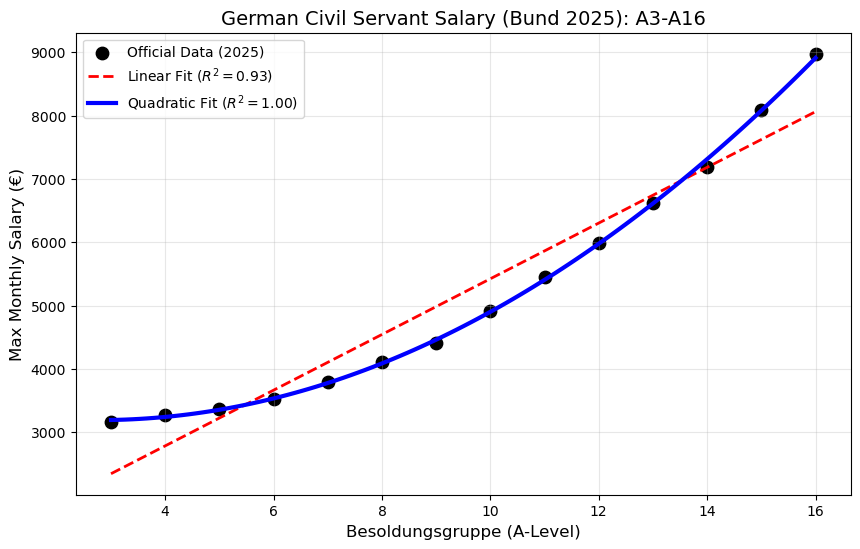

In [18]:
steps = 100
x_min, x_max = 3.0, 16.0
step_size = (x_max - x_min) / steps
plot_x_vals = [x_min + i * step_size for i in range(steps + 1)]

# 1. Predict Linear: Build matrix [[x, 1]...]
X_plot_lin = np.array([[x, 1.0] for x in plot_x_vals])
Y_pred_lin = X_plot_lin @ w_linear

# 2. Predict Poly: Build matrix [[x^2, x, 1]...]
X_plot_poly = np.array([[x**2, x, 1.0] for x in plot_x_vals])
Y_pred_poly = X_plot_poly @ w_poly

# 3. Plot
plt.figure(figsize=(10, 6))
plt.scatter(grades_list, salary_list, color='black', s=80, label='Official Data (2025)')
plt.plot(plot_x_vals, Y_pred_lin, color='red', linestyle='--', linewidth=2, label=f'Linear Fit ($R^2={R2_linear:.2f}$)')
plt.plot(plot_x_vals, Y_pred_poly, color='blue', linewidth=3, label=f'Quadratic Fit ($R^2={R2_poly:.2f}$)')

plt.title('German Civil Servant Salary (Bund 2025): A3-A16', fontsize=14)
plt.xlabel('Besoldungsgruppe (A-Level)', fontsize=12)
plt.ylabel('Max Monthly Salary (€)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()